# Salary Assignment 3: Multivariate Regression

### In the next series of challenges, we will predict employee salaries from different employee characteristics (or features).

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from IPython.display import display
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

#set up a large font for our pyplot
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams["figure.figsize"] = [14,9]

# Python's default exception mode is too verbose, let's set it to 'plain'
%xmode plain
data = pd.DataFrame()

Exception reporting mode: Plain


#### Import the data salary.csv to a Jupyter Notebook.

In [2]:
data = pd.read_csv("salary.csv")
data = data.drop(data.index[208]) # This row has a null value for the salary
data = data.sort_values('salary')
data.reset_index(drop=True, inplace=True)
display(data.tail())

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
508,83192.23438,11,19,19,0.92,1,1,3,1,2,0
509,89789.00000,11,22,21,0.93,1,0,3,1,2,2
510,90082.00000,10,22,22,1.00,1,0,3,1,2,2
511,91405.00000,0,23,14,1.18,1,0,3,1,1,0
512,96156.00000,20,12,12,1.19,1,0,3,1,1,2


### Use multiple linear regression to predict salary from all the variables in the dataset.

#### a)	Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

In [3]:
data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


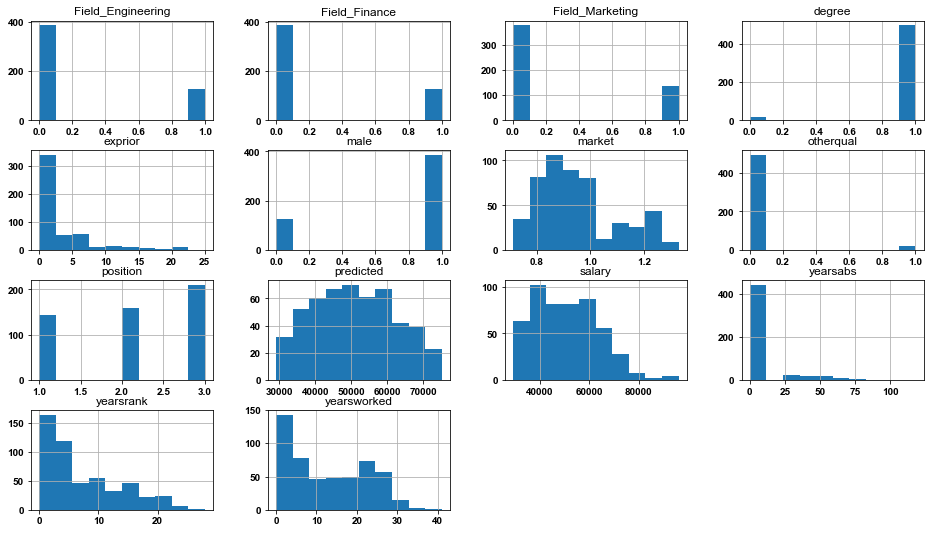

In [30]:
data.hist(grid=True)
plt.show()

In [5]:
data.columns

Index(['salary', 'exprior', 'yearsworked', 'yearsrank', 'market', 'degree',
       'otherqual', 'position', 'male', 'Field', 'yearsabs'],
      dtype='object')

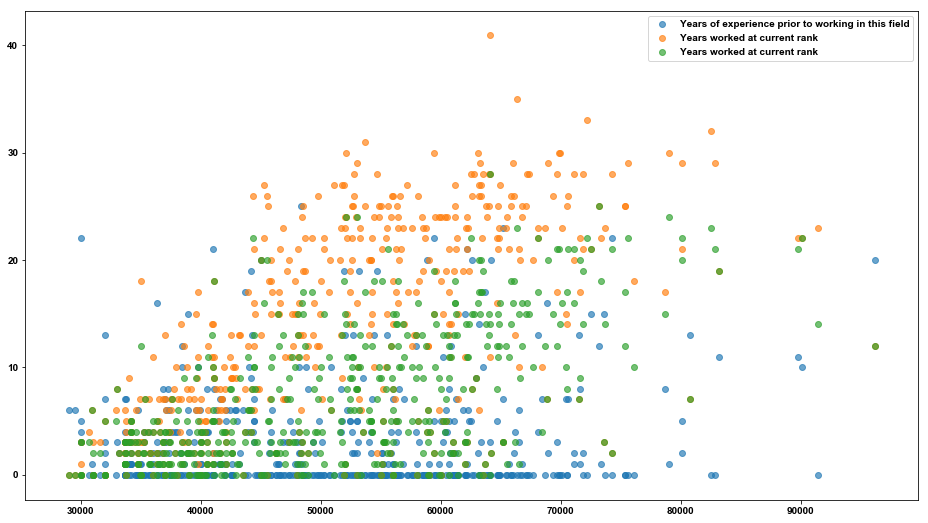

In [6]:
plt.rcParams["figure.figsize"] = [16,9]

outcome = "salary"
predictors = ['exprior', 'yearsworked', 'yearsrank']
# , 'degree', 'otherqual', 'position', 'male', 'Field', 'yearsabs'
# , 'Has degree', 'Has other post-secondary qualification', 'Position (1 = Junior Employee, 2 = Manager, 3 = Executive)', 'Male', 'Field of work', 'Years absent from work'
predictor_labels = ['Years of experience prior to working in this field', 'Years worked at current rank', 
                    'Years worked at current rank ']

fig, ax = plt.subplots()
for i, predictor in enumerate(predictors):
    ax.scatter(data[outcome], data[predictor], alpha=0.66, label=predictor_labels[i])
ax.legend()
plt.show()

### b)	Recode the variable Field into three dummy variables, using HR as the reference category.

In [7]:
data['Field'] = data['Field'].map({1: "Engineering", 2: "Finance", 3: "Human Resources", 4: "Marketing"})
data['Field'].tail()

508        Finance
509        Finance
510        Finance
511    Engineering
512    Engineering
Name: Field, dtype: object

In [8]:
field_dummies = pd.get_dummies(data['Field'], prefix="Field")
display(field_dummies.columns)
field_dummies.drop('Field_Human Resources', axis='columns', inplace=True)
data.drop('Field', axis='columns', inplace=True)
data = pd.concat([data, field_dummies], axis='columns')
display(data.head())

Index(['Field_Engineering', 'Field_Finance', 'Field_Human Resources',
       'Field_Marketing'],
      dtype='object')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Field_Engineering,Field_Finance,Field_Marketing
0,29000.0,6,0,0,0.78,0,0,1,1,0,0,0,0
1,29500.0,6,0,0,0.79,1,0,1,1,0,0,0,0
2,30000.0,3,0,0,0.78,0,0,1,1,2,0,0,0
3,30000.0,0,0,0,0.81,1,0,1,0,3,0,0,0
4,30000.0,22,1,0,0.79,1,0,1,1,1,0,0,0


### c)
#### - Produce a correlation matrix comparing the relationship of salary to the predictor variables.

matplotlib.axes._subplots.AxesSubplot

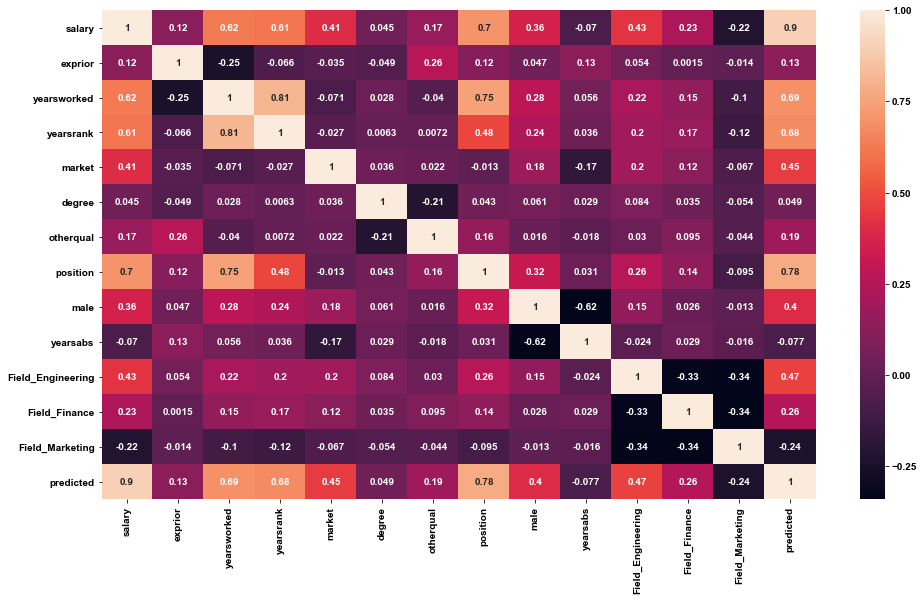

In [29]:
corr = data.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, robust=True, annot=True)
type(ax)

#### - Is there any multicollinearity or other problems that may be a problem in the multiple regression?

#### >>> No. The map shows there's not a lot of heat, or multicollinearity between indepedent variables.

#### d)	Run the multiple linear regression and interpret the correlation coefficients. What are the most important features when predicting employee salary?

In [10]:
features = ['exprior', 'yearsworked', 'yearsrank', 'market', 'degree',
       'otherqual', 'position', 'male', 'yearsabs', 'Field_Engineering',
       'Field_Finance', 'Field_Marketing']
X = data[features]
y = data['salary']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print("R^2 score = " + str(lm.score(X, y)))
print("lm.coef_ ==> " + str(lm.coef_))
display("lm.intercept_ = " + str(lm.intercept_))

R^2 score = 0.8132509834368525
lm.coef_ ==> [ 1.58607350e+02 -1.21127885e+02  7.75517646e+02  3.00625195e+04
 -1.00487028e+01  2.34555099e+03  7.64339294e+03  4.25352595e+02
 -2.36181983e+01  6.15645091e+03  3.99030111e+03  3.84835061e+02]


'lm.intercept_ = -1155.8861527985136'

### >>> The R^2 score shows 81.32% of the variance in the predicted values can be explained in the model.

In [11]:
coefficients = {}
for i, feature in enumerate(features):
    coefficients[feature] = lm.coef_[i]
    
display(coefficients)

{'Field_Engineering': 6156.450906137519,
 'Field_Finance': 3990.3011072512,
 'Field_Marketing': 384.8350613160037,
 'degree': -10.0487027728459,
 'exprior': 158.6073500981852,
 'male': 425.3525952616328,
 'market': 30062.519514889744,
 'otherqual': 2345.5509913097303,
 'position': 7643.392936592898,
 'yearsabs': -23.618198319674775,
 'yearsrank': 775.5176462942027,
 'yearsworked': -121.12788483782873}

In [12]:
r2_score(data.salary, predictions) * 100

81.32509834368526

### e)	Plot the standardised residuals versus the standardised predicted values. Are there any problems with the regression?

In [13]:
data['predicted'] = [prediction for prediction in predictions]

Equation for Observed Salary trendline: y = 837.33x + (40115.01)
Equation for Predicted Salary trendline: y = 837.33x + (40115.01)


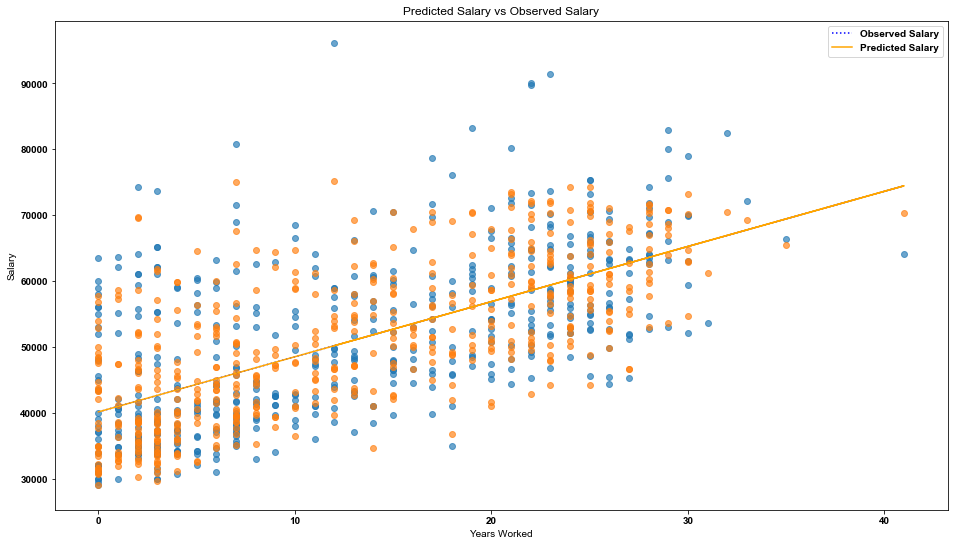

In [14]:
fig, ax = plt.subplots()

x = data['yearsworked']
y1 = data['salary']
y2 = data['predicted']

ax.scatter(x, y1, alpha=0.66)
ax.scatter(x, y2, alpha=0.66)

z = np.polyfit(x, y1, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'b:')
print("Equation for Observed Salary trendline: y = %.2fx + (%.2f)"%(z[0],z[1]))

z = np.polyfit(x, y2, 1)
p = np.poly1d(z)
plt.plot(x, p(x), '#FFA500')
print("Equation for Predicted Salary trendline: y = %.2fx + (%.2f)"%(z[0],z[1]))

plt.legend(['Observed Salary', 'Predicted Salary'])
plt.title('Predicted Salary vs Observed Salary')
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.show()

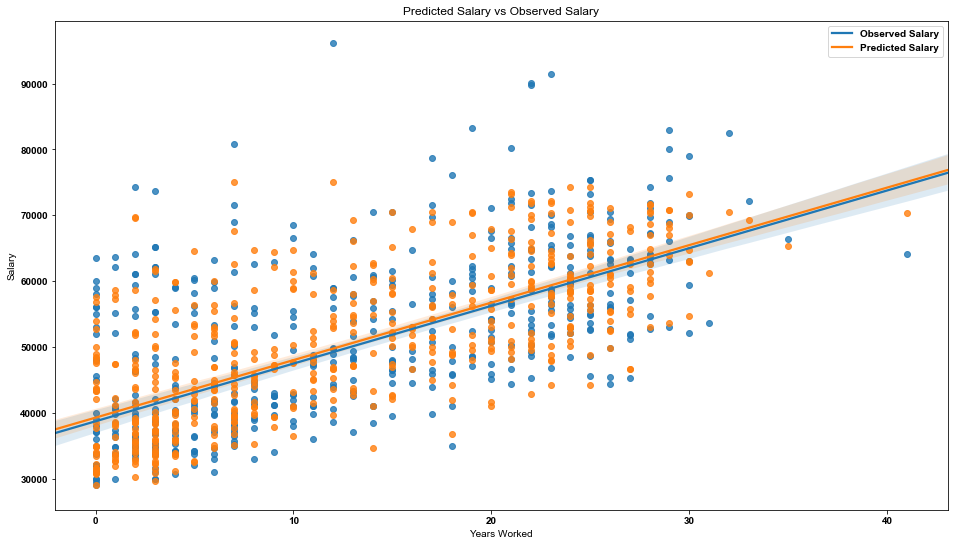

In [77]:
sns.regplot(x='yearsworked', y='salary', data=data, robust=True)
sns.regplot(x='yearsworked', y='predicted', data=data, robust=True)
plt.legend(['Observed Salary', 'Predicted Salary'])
plt.title('Predicted Salary vs Observed Salary')
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.show()

### >>> The regression seems to be very close to the actual values. There doesn't seem to be much difference between Predicted salary versus Observed salary, except perhaps for the extreme outliers.

### f)	Get and interpret the partial coefficients and tolerance values for the regression model.

#### >>> Partial coefficients ==>

In [75]:
samples = [data['salary'], data['predicted']]
labels = ['salary', 'predicted']
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence
gb = GradientBoostingClassifier(random_state=0).fit(samples, labels)
kwargs = dict(X=samples, percentiles=(0, 1), grid_resolution=2)
print("Partial coefficient's: " + str(partial_dependence(gb, [0], **kwargs)))

Partial coefficient's: (array([[1.22716943e-13, 1.22716943e-13]]), [array([29000.        , 31313.26757812])])


#### >>> Tolerance values ==>

In [76]:
# parametric tolerance interval
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm

# specify degrees of freedom
n = len(data)
dof = n - 1
# specify data coverage
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.isf(prop_inv)
print('Gaussian critical value: {:10.3f} (coverage={})'.format(gauss_critical, prop*100))
# specify confidence
prob = 0.99
chi_critical = chi2.isf(q=prob, df=dof)
print('Chi-Squared critical value: {:9.3f} (prob={}, dof={})'.format(chi_critical, prob*100, dof))
# tolerance
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: {:15.3f}'.format(interval))
print('\n')
# summarize
data_mean = mean(data['predicted'])
lower, upper = data_mean-interval, data_mean+interval
# print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))
print('{:.2f} to {:.2f} covers {:.0f}% of data with a confidence of {:.0f}%'.format(lower, upper, prop*100, prob*100))

Gaussian critical value:      1.960 (coverage=95.0)
Chi-Squared critical value:   440.510 (prob=99.0, dof=512)
Tolerance Interval:           2.115


50861.11 to 50865.34 covers 95% of data with a confidence of 99%


### Are there any problems with this model?

#### >>> ?No. The partial coeeficients look okay?. The tolerance values are also in the acceptable range.?